# 1. Import and Install Dependencies

In [1]:
!pip install tensorflow

     ------------------------------------ 266.3/266.3 MB 558.5 kB/s eta 0:00:00
     -------------------------------------- 57.5/57.5 kB 251.2 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 109.1 kB/s eta 0:00:00
     -------------------------------------- 14.2/14.2 MB 300.6 kB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 513.6 kB/s eta 0:00:00
     ------------------------------------ 439.2/439.2 kB 763.3 kB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 1.1 MB/s eta 0:00:00
     -------------------------------------- 65.5/65.5 kB 442.0 kB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 749.9 kB/s eta 0:00:00
     ------------------------------------ 124.6/124.6 kB 261.1 kB/s eta 0:00:00
     ------------------------------------ 896.6/896.6 kB 644.6 kB/s eta 0:00:00
     -------------------------------------- 93.3/93.3 kB 664.4 kB/s eta 0:00:00
     ------------------------------------ 

In [1]:
!pip install mediapipe 

  Using cached mediapipe-0.9.0-cp37-cp37m-win_amd64.whl (49.8 MB)
  Using cached opencv_contrib_python-4.6.0.66-cp36-abi3-win_amd64.whl (42.5 MB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\hadeel\\AppData\\Local\\Continuum\\anaconda3\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.



In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [9]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [10]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [11]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [12]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [18]:
# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():

#         # Read feed
#         ret, frame = cap.read()

#         # Make detections
#         image, results = mediapipe_detection(frame, holistic)
#         print(results)
        
#         # Draw landmarks
#         draw_styled_landmarks(image, results)

#         # Show to screen
#         cv2.imshow('OpenCV Feed', image)

#         # Break gracefully
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break
#     cap.release()
#     cv2.destroyAllWindows()

In [13]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [14]:
cap.release()
cv2.destroyAllWindows()

In [15]:
len(results.left_hand_landmarks.landmark)

21

In [16]:
results

mediapipe.python.solution_base.SolutionOutputs

In [17]:
draw_landmarks(frame, results)

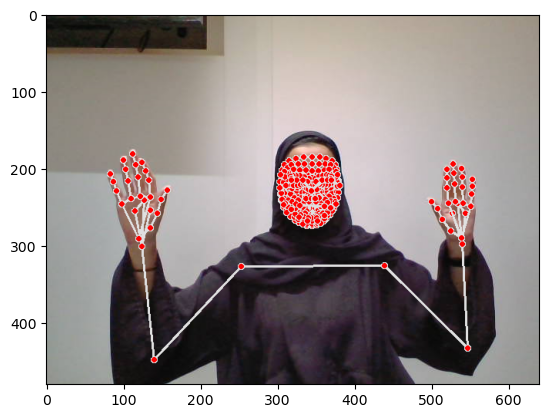

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [19]:
len(results.left_hand_landmarks.landmark)

21

In [20]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [21]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [23]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()
if results.face_landmarks: 
    else np.zeros(1404)

SyntaxError: invalid syntax (1800927791.py, line 3)

In [24]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [25]:
result_test = extract_keypoints(results)

In [26]:
result_test

array([ 0.53889865,  0.4791247 , -0.92709512, ...,  0.13071923,
        0.43222332, -0.0328547 ])

In [27]:
468*3+33*4+21*3+21*3

1662

In [28]:
np.save('0', result_test)

In [29]:
np.load('0.npy')

array([ 0.53889865,  0.4791247 , -0.92709512, ...,  0.13071923,
        0.43222332, -0.0328547 ])

# 4. Setup Folders for Collection

In [30]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['السلام', 'عليكم', 'اهلا'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [37]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [31]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [32]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [33]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [34]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [35]:
label_map = {label:num for num, label in enumerate(actions)}

In [36]:
label_map

{'السلام': 0, 'عليكم': 1, 'اهلا': 2}

In [37]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [38]:
np.array(sequences).shape

(90, 30, 1662)

In [39]:
np.array(labels).shape

(90,)

In [40]:
X = np.array(sequences)

In [41]:
X.shape

(90, 30, 1662)

In [42]:
y = to_categorical(labels).astype(int)

In [43]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [45]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [47]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [48]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [49]:
res = [.7, 0.2, 0.1]



In [50]:
actions[np.argmax(res)]

'السلام'

In [51]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [52]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 81ms/step - loss: 1.3931 - categorical_accuracy: 0.3529
Epoch 2/2000
3/3 [==============================] - 0s 72ms/step - loss: 3.8224 - categorical_accuracy: 0.4000
Epoch 3/2000
3/3 [==============================] - 0s 74ms/step - loss: 5.6961 - categorical_accuracy: 0.3412
Epoch 4/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.1799 - categorical_accuracy: 0.1882
Epoch 5/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.1228 - categorical_accuracy: 0.3529
Epoch 6/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.2527 - categorical_accuracy: 0.4000
Epoch 7/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.5675 - categorical_accuracy: 0.2941
Epoch 8/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.1307 - categorical_accuracy: 0.3412
Epoch 9/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.0829 - categorical_accuracy: 0.5882
E

3/3 [==============================] - 0s 72ms/step - loss: 0.5478 - categorical_accuracy: 0.7647
Epoch 75/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.5356 - categorical_accuracy: 0.7647
Epoch 76/2000
3/3 [==============================] - 0s 65ms/step - loss: 0.6289 - categorical_accuracy: 0.6824
Epoch 77/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.6019 - categorical_accuracy: 0.6824
Epoch 78/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.5224 - categorical_accuracy: 0.7647
Epoch 79/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.5591 - categorical_accuracy: 0.8000
Epoch 80/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.6064 - categorical_accuracy: 0.6706
Epoch 81/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.5400 - categorical_accuracy: 0.7647
Epoch 82/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.5710 - categorical_accuracy: 0.7176
Epoch 

3/3 [==============================] - 0s 90ms/step - loss: 0.4159 - categorical_accuracy: 0.8000
Epoch 147/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.4467 - categorical_accuracy: 0.7529
Epoch 148/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.4075 - categorical_accuracy: 0.8118
Epoch 149/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.3724 - categorical_accuracy: 0.8000
Epoch 150/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.3679 - categorical_accuracy: 0.8000
Epoch 151/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.3904 - categorical_accuracy: 0.8000
Epoch 152/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.3616 - categorical_accuracy: 0.8000
Epoch 153/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.3974 - categorical_accuracy: 0.8471
Epoch 154/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.4239 - categorical_accuracy: 0.

3/3 [==============================] - 0s 93ms/step - loss: 0.2838 - categorical_accuracy: 0.8706
Epoch 219/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.2599 - categorical_accuracy: 0.8941
Epoch 220/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.2330 - categorical_accuracy: 0.9059
Epoch 221/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.2291 - categorical_accuracy: 0.8941
Epoch 222/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.2069 - categorical_accuracy: 0.8824
Epoch 223/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.2217 - categorical_accuracy: 0.8824
Epoch 224/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.2105 - categorical_accuracy: 0.8824
Epoch 225/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.2649 - categorical_accuracy: 0.8588
Epoch 226/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.2418 - categorical_accuracy: 0.882

3/3 [==============================] - 0s 95ms/step - loss: 0.3623 - categorical_accuracy: 0.8353
Epoch 291/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.3396 - categorical_accuracy: 0.8353
Epoch 292/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.3310 - categorical_accuracy: 0.8235
Epoch 293/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.3266 - categorical_accuracy: 0.8000
Epoch 294/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.3710 - categorical_accuracy: 0.8118
Epoch 295/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.3864 - categorical_accuracy: 0.8353
Epoch 296/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.4307 - categorical_accuracy: 0.7765
Epoch 297/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.3253 - categorical_accuracy: 0.8353
Epoch 298/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.3330 - categorical_accuracy: 0.8

3/3 [==============================] - 0s 70ms/step - loss: 0.4430 - categorical_accuracy: 0.8000
Epoch 363/2000
3/3 [==============================] - 0s 68ms/step - loss: 0.3377 - categorical_accuracy: 0.8353
Epoch 364/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.3406 - categorical_accuracy: 0.8353
Epoch 365/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.3398 - categorical_accuracy: 0.8471
Epoch 366/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.3748 - categorical_accuracy: 0.8000
Epoch 367/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.3561 - categorical_accuracy: 0.8118
Epoch 368/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.3565 - categorical_accuracy: 0.8471
Epoch 369/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.2492 - categorical_accuracy: 0.8824
Epoch 370/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.2745 - categorical_accuracy: 0.870

3/3 [==============================] - 0s 79ms/step - loss: 0.3873 - categorical_accuracy: 0.8118
Epoch 435/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.2551 - categorical_accuracy: 0.8824
Epoch 436/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.2532 - categorical_accuracy: 0.8471
Epoch 437/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.2108 - categorical_accuracy: 0.8706
Epoch 438/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.2137 - categorical_accuracy: 0.8824
Epoch 439/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.2591 - categorical_accuracy: 0.8588
Epoch 440/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.2206 - categorical_accuracy: 0.8941
Epoch 441/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.2337 - categorical_accuracy: 0.8824
Epoch 442/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.2106 - categorical_accuracy: 0.870

3/3 [==============================] - 0s 92ms/step - loss: 0.2260 - categorical_accuracy: 0.8824
Epoch 507/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.1971 - categorical_accuracy: 0.8941
Epoch 508/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1952 - categorical_accuracy: 0.9294
Epoch 509/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.1915 - categorical_accuracy: 0.9176
Epoch 510/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.1646 - categorical_accuracy: 0.9294
Epoch 511/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1740 - categorical_accuracy: 0.8941
Epoch 512/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.2075 - categorical_accuracy: 0.8824
Epoch 513/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.1833 - categorical_accuracy: 0.9059
Epoch 514/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.2341 - categorical_accuracy: 0.847

3/3 [==============================] - 0s 78ms/step - loss: 0.1188 - categorical_accuracy: 0.9529
Epoch 579/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.1345 - categorical_accuracy: 0.9294
Epoch 580/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1142 - categorical_accuracy: 0.9412
Epoch 581/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.1506 - categorical_accuracy: 0.9294
Epoch 582/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1713 - categorical_accuracy: 0.9176
Epoch 583/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1246 - categorical_accuracy: 0.9529
Epoch 584/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0977 - categorical_accuracy: 0.9529
Epoch 585/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.1120 - categorical_accuracy: 0.9529
Epoch 586/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1510 - categorical_accuracy: 0.941

3/3 [==============================] - 0s 70ms/step - loss: 0.2651 - categorical_accuracy: 0.8941
Epoch 651/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.4344 - categorical_accuracy: 0.8353
Epoch 652/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.1977 - categorical_accuracy: 0.9412
Epoch 653/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.3142 - categorical_accuracy: 0.7882
Epoch 654/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.2921 - categorical_accuracy: 0.8941
Epoch 655/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.2524 - categorical_accuracy: 0.8824
Epoch 656/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.2616 - categorical_accuracy: 0.8706
Epoch 657/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.2046 - categorical_accuracy: 0.9059
Epoch 658/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.2261 - categorical_accuracy: 0.882

3/3 [==============================] - 0s 86ms/step - loss: 0.2287 - categorical_accuracy: 0.9059
Epoch 723/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1386 - categorical_accuracy: 0.9412
Epoch 724/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.1782 - categorical_accuracy: 0.9176
Epoch 725/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.1865 - categorical_accuracy: 0.9294
Epoch 726/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.2585 - categorical_accuracy: 0.8941
Epoch 727/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.1297 - categorical_accuracy: 0.9647
Epoch 728/2000
3/3 [==============================] - 0s 71ms/step - loss: 0.1964 - categorical_accuracy: 0.8941
Epoch 729/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.2133 - categorical_accuracy: 0.8824
Epoch 730/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.1366 - categorical_accuracy: 0.941

3/3 [==============================] - 0s 90ms/step - loss: 0.0702 - categorical_accuracy: 0.9765
Epoch 795/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.0623 - categorical_accuracy: 0.9765
Epoch 796/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0665 - categorical_accuracy: 0.9765
Epoch 797/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0465 - categorical_accuracy: 0.9882
Epoch 798/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0402 - categorical_accuracy: 0.9882
Epoch 799/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0320 - categorical_accuracy: 1.0000
Epoch 800/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0284 - categorical_accuracy: 1.0000
Epoch 801/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0237 - categorical_accuracy: 1.0000
Epoch 802/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0224 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 78ms/step - loss: 0.0058 - categorical_accuracy: 1.0000
Epoch 867/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.0066 - categorical_accuracy: 1.0000
Epoch 868/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0053 - categorical_accuracy: 1.0000
Epoch 869/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.0058 - categorical_accuracy: 1.0000
Epoch 870/2000
3/3 [==============================] - 0s 74ms/step - loss: 0.0046 - categorical_accuracy: 1.0000
Epoch 871/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0062 - categorical_accuracy: 1.0000
Epoch 872/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0066 - categorical_accuracy: 1.0000
Epoch 873/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0069 - categorical_accuracy: 1.0000
Epoch 874/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0045 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 78ms/step - loss: 0.0526 - categorical_accuracy: 0.9647
Epoch 939/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0371 - categorical_accuracy: 1.0000
Epoch 940/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.0265 - categorical_accuracy: 1.0000
Epoch 941/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0177 - categorical_accuracy: 0.9882
Epoch 942/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0087 - categorical_accuracy: 1.0000
Epoch 943/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.0090 - categorical_accuracy: 1.0000
Epoch 944/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0138 - categorical_accuracy: 0.9882
Epoch 945/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.0062 - categorical_accuracy: 1.0000
Epoch 946/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0065 - categorical_accuracy: 1.000

3/3 [==============================] - 0s 87ms/step - loss: 3.9768e-04 - categorical_accuracy: 1.0000
Epoch 1010/2000
3/3 [==============================] - 0s 86ms/step - loss: 3.8683e-04 - categorical_accuracy: 1.0000
Epoch 1011/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.6945e-04 - categorical_accuracy: 1.0000
Epoch 1012/2000
3/3 [==============================] - 0s 102ms/step - loss: 3.5724e-04 - categorical_accuracy: 1.0000
Epoch 1013/2000
3/3 [==============================] - 0s 97ms/step - loss: 3.4488e-04 - categorical_accuracy: 1.0000
Epoch 1014/2000
3/3 [==============================] - 0s 96ms/step - loss: 3.3455e-04 - categorical_accuracy: 1.0000
Epoch 1015/2000
3/3 [==============================] - 0s 99ms/step - loss: 3.1900e-04 - categorical_accuracy: 1.0000
Epoch 1016/2000
3/3 [==============================] - 0s 97ms/step - loss: 3.0942e-04 - categorical_accuracy: 1.0000
Epoch 1017/2000
3/3 [==============================] - 0s 84ms/step - l

3/3 [==============================] - 0s 75ms/step - loss: 8.8146e-05 - categorical_accuracy: 1.0000
Epoch 1079/2000
3/3 [==============================] - 0s 70ms/step - loss: 8.6995e-05 - categorical_accuracy: 1.0000
Epoch 1080/2000
3/3 [==============================] - 0s 80ms/step - loss: 8.5973e-05 - categorical_accuracy: 1.0000
Epoch 1081/2000
3/3 [==============================] - 0s 78ms/step - loss: 8.5191e-05 - categorical_accuracy: 1.0000
Epoch 1082/2000
3/3 [==============================] - 0s 79ms/step - loss: 8.4149e-05 - categorical_accuracy: 1.0000
Epoch 1083/2000
3/3 [==============================] - 0s 78ms/step - loss: 8.3112e-05 - categorical_accuracy: 1.0000
Epoch 1084/2000
3/3 [==============================] - 0s 76ms/step - loss: 8.2038e-05 - categorical_accuracy: 1.0000
Epoch 1085/2000
3/3 [==============================] - 0s 81ms/step - loss: 8.1360e-05 - categorical_accuracy: 1.0000
Epoch 1086/2000
3/3 [==============================] - 0s 90ms/step - lo

3/3 [==============================] - 0s 78ms/step - loss: 4.7443e-05 - categorical_accuracy: 1.0000
Epoch 1148/2000
3/3 [==============================] - 0s 72ms/step - loss: 4.7087e-05 - categorical_accuracy: 1.0000
Epoch 1149/2000
3/3 [==============================] - 0s 70ms/step - loss: 4.6689e-05 - categorical_accuracy: 1.0000
Epoch 1150/2000
3/3 [==============================] - 0s 78ms/step - loss: 4.6341e-05 - categorical_accuracy: 1.0000
Epoch 1151/2000
3/3 [==============================] - 0s 78ms/step - loss: 4.5984e-05 - categorical_accuracy: 1.0000
Epoch 1152/2000
3/3 [==============================] - 0s 78ms/step - loss: 4.5667e-05 - categorical_accuracy: 1.0000
Epoch 1153/2000
3/3 [==============================] - 0s 78ms/step - loss: 4.5407e-05 - categorical_accuracy: 1.0000
Epoch 1154/2000
3/3 [==============================] - 0s 86ms/step - loss: 4.5074e-05 - categorical_accuracy: 1.0000
Epoch 1155/2000
3/3 [==============================] - 0s 70ms/step - lo

3/3 [==============================] - 0s 92ms/step - loss: 3.0612e-05 - categorical_accuracy: 1.0000
Epoch 1217/2000
3/3 [==============================] - 0s 93ms/step - loss: 3.0432e-05 - categorical_accuracy: 1.0000
Epoch 1218/2000
3/3 [==============================] - 0s 117ms/step - loss: 3.0303e-05 - categorical_accuracy: 1.0000
Epoch 1219/2000
3/3 [==============================] - 0s 93ms/step - loss: 3.0182e-05 - categorical_accuracy: 1.0000
Epoch 1220/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.9971e-05 - categorical_accuracy: 1.0000
Epoch 1221/2000
3/3 [==============================] - 0s 96ms/step - loss: 2.9784e-05 - categorical_accuracy: 1.0000
Epoch 1222/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.9666e-05 - categorical_accuracy: 1.0000
Epoch 1223/2000
3/3 [==============================] - 0s 88ms/step - loss: 2.9453e-05 - categorical_accuracy: 1.0000
Epoch 1224/2000
3/3 [==============================] - 0s 78ms/step - l

3/3 [==============================] - 0s 72ms/step - loss: 2.1640e-05 - categorical_accuracy: 1.0000
Epoch 1286/2000
3/3 [==============================] - 0s 85ms/step - loss: 2.1480e-05 - categorical_accuracy: 1.0000
Epoch 1287/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.1387e-05 - categorical_accuracy: 1.0000
Epoch 1288/2000
3/3 [==============================] - 0s 87ms/step - loss: 2.1289e-05 - categorical_accuracy: 1.0000
Epoch 1289/2000
3/3 [==============================] - 0s 70ms/step - loss: 2.1173e-05 - categorical_accuracy: 1.0000
Epoch 1290/2000
3/3 [==============================] - 0s 88ms/step - loss: 2.1072e-05 - categorical_accuracy: 1.0000
Epoch 1291/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.0985e-05 - categorical_accuracy: 1.0000
Epoch 1292/2000
3/3 [==============================] - 0s 94ms/step - loss: 2.0912e-05 - categorical_accuracy: 1.0000
Epoch 1293/2000
3/3 [==============================] - 0s 108ms/step - 

3/3 [==============================] - 0s 78ms/step - loss: 1.5665e-05 - categorical_accuracy: 1.0000
Epoch 1355/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.5575e-05 - categorical_accuracy: 1.0000
Epoch 1356/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.5505e-05 - categorical_accuracy: 1.0000
Epoch 1357/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.5449e-05 - categorical_accuracy: 1.0000
Epoch 1358/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.5364e-05 - categorical_accuracy: 1.0000
Epoch 1359/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.5313e-05 - categorical_accuracy: 1.0000
Epoch 1360/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.5225e-05 - categorical_accuracy: 1.0000
Epoch 1361/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.5180e-05 - categorical_accuracy: 1.0000
Epoch 1362/2000
3/3 [==============================] - 0s 78ms/step - lo

3/3 [==============================] - 0s 85ms/step - loss: 1.1450e-05 - categorical_accuracy: 1.0000
Epoch 1424/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.1425e-05 - categorical_accuracy: 1.0000
Epoch 1425/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.1360e-05 - categorical_accuracy: 1.0000
Epoch 1426/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.1335e-05 - categorical_accuracy: 1.0000
Epoch 1427/2000
3/3 [==============================] - 0s 70ms/step - loss: 1.1252e-05 - categorical_accuracy: 1.0000
Epoch 1428/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.1214e-05 - categorical_accuracy: 1.0000
Epoch 1429/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.1164e-05 - categorical_accuracy: 1.0000
Epoch 1430/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.1109e-05 - categorical_accuracy: 1.0000
Epoch 1431/2000
3/3 [==============================] - 0s 70ms/step - lo

3/3 [==============================] - 0s 78ms/step - loss: 8.4393e-06 - categorical_accuracy: 1.0000
Epoch 1493/2000
3/3 [==============================] - 0s 81ms/step - loss: 8.3958e-06 - categorical_accuracy: 1.0000
Epoch 1494/2000
3/3 [==============================] - 0s 86ms/step - loss: 8.3650e-06 - categorical_accuracy: 1.0000
Epoch 1495/2000
3/3 [==============================] - 0s 78ms/step - loss: 8.3313e-06 - categorical_accuracy: 1.0000
Epoch 1496/2000
3/3 [==============================] - 0s 78ms/step - loss: 8.2949e-06 - categorical_accuracy: 1.0000
Epoch 1497/2000
3/3 [==============================] - 0s 78ms/step - loss: 8.2542e-06 - categorical_accuracy: 1.0000
Epoch 1498/2000
3/3 [==============================] - 0s 78ms/step - loss: 8.2234e-06 - categorical_accuracy: 1.0000
Epoch 1499/2000
3/3 [==============================] - 0s 88ms/step - loss: 8.1813e-06 - categorical_accuracy: 1.0000
Epoch 1500/2000
3/3 [==============================] - 0s 86ms/step - lo

3/3 [==============================] - 0s 78ms/step - loss: 6.1873e-06 - categorical_accuracy: 1.0000
Epoch 1562/2000
3/3 [==============================] - 0s 78ms/step - loss: 6.1718e-06 - categorical_accuracy: 1.0000
Epoch 1563/2000
3/3 [==============================] - 0s 78ms/step - loss: 6.1298e-06 - categorical_accuracy: 1.0000
Epoch 1564/2000
3/3 [==============================] - 0s 82ms/step - loss: 6.1003e-06 - categorical_accuracy: 1.0000
Epoch 1565/2000
3/3 [==============================] - 0s 78ms/step - loss: 6.0709e-06 - categorical_accuracy: 1.0000
Epoch 1566/2000
3/3 [==============================] - 0s 74ms/step - loss: 6.0526e-06 - categorical_accuracy: 1.0000
Epoch 1567/2000
3/3 [==============================] - 0s 84ms/step - loss: 6.0218e-06 - categorical_accuracy: 1.0000
Epoch 1568/2000
3/3 [==============================] - 0s 83ms/step - loss: 5.9853e-06 - categorical_accuracy: 1.0000
Epoch 1569/2000
3/3 [==============================] - 0s 85ms/step - lo

3/3 [==============================] - 0s 98ms/step - loss: 4.5339e-06 - categorical_accuracy: 1.0000
Epoch 1631/2000
3/3 [==============================] - 0s 82ms/step - loss: 4.5101e-06 - categorical_accuracy: 1.0000
Epoch 1632/2000
3/3 [==============================] - 0s 92ms/step - loss: 4.4904e-06 - categorical_accuracy: 1.0000
Epoch 1633/2000
3/3 [==============================] - 0s 88ms/step - loss: 4.4680e-06 - categorical_accuracy: 1.0000
Epoch 1634/2000
3/3 [==============================] - 0s 86ms/step - loss: 4.4526e-06 - categorical_accuracy: 1.0000
Epoch 1635/2000
3/3 [==============================] - 0s 95ms/step - loss: 4.4442e-06 - categorical_accuracy: 1.0000
Epoch 1636/2000
3/3 [==============================] - 0s 96ms/step - loss: 4.4133e-06 - categorical_accuracy: 1.0000
Epoch 1637/2000
3/3 [==============================] - 0s 82ms/step - loss: 4.3909e-06 - categorical_accuracy: 1.0000
Epoch 1638/2000
3/3 [==============================] - 0s 85ms/step - lo

3/3 [==============================] - 0s 78ms/step - loss: 3.3167e-06 - categorical_accuracy: 1.0000
Epoch 1700/2000
3/3 [==============================] - 0s 70ms/step - loss: 3.3069e-06 - categorical_accuracy: 1.0000
Epoch 1701/2000
3/3 [==============================] - 0s 70ms/step - loss: 3.2956e-06 - categorical_accuracy: 1.0000
Epoch 1702/2000
3/3 [==============================] - 0s 78ms/step - loss: 3.2830e-06 - categorical_accuracy: 1.0000
Epoch 1703/2000
3/3 [==============================] - 0s 70ms/step - loss: 3.2648e-06 - categorical_accuracy: 1.0000
Epoch 1704/2000
3/3 [==============================] - 0s 78ms/step - loss: 3.2480e-06 - categorical_accuracy: 1.0000
Epoch 1705/2000
3/3 [==============================] - 0s 78ms/step - loss: 3.2381e-06 - categorical_accuracy: 1.0000
Epoch 1706/2000
3/3 [==============================] - 0s 70ms/step - loss: 3.2213e-06 - categorical_accuracy: 1.0000
Epoch 1707/2000
3/3 [==============================] - 0s 78ms/step - lo

3/3 [==============================] - 0s 78ms/step - loss: 2.4528e-06 - categorical_accuracy: 1.0000
Epoch 1769/2000
3/3 [==============================] - 0s 88ms/step - loss: 2.4430e-06 - categorical_accuracy: 1.0000
Epoch 1770/2000
3/3 [==============================] - 0s 87ms/step - loss: 2.4318e-06 - categorical_accuracy: 1.0000
Epoch 1771/2000
3/3 [==============================] - 0s 86ms/step - loss: 2.4248e-06 - categorical_accuracy: 1.0000
Epoch 1772/2000
3/3 [==============================] - 0s 86ms/step - loss: 2.4122e-06 - categorical_accuracy: 1.0000
Epoch 1773/2000
3/3 [==============================] - 0s 70ms/step - loss: 2.4037e-06 - categorical_accuracy: 1.0000
Epoch 1774/2000
3/3 [==============================] - 0s 78ms/step - loss: 2.3939e-06 - categorical_accuracy: 1.0000
Epoch 1775/2000
3/3 [==============================] - 0s 84ms/step - loss: 2.3841e-06 - categorical_accuracy: 1.0000
Epoch 1776/2000
3/3 [==============================] - 0s 76ms/step - lo

3/3 [==============================] - 0s 85ms/step - loss: 1.8372e-06 - categorical_accuracy: 1.0000
Epoch 1838/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.8288e-06 - categorical_accuracy: 1.0000
Epoch 1839/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.8231e-06 - categorical_accuracy: 1.0000
Epoch 1840/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.8133e-06 - categorical_accuracy: 1.0000
Epoch 1841/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.8077e-06 - categorical_accuracy: 1.0000
Epoch 1842/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.8007e-06 - categorical_accuracy: 1.0000
Epoch 1843/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.7937e-06 - categorical_accuracy: 1.0000
Epoch 1844/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.7839e-06 - categorical_accuracy: 1.0000
Epoch 1845/2000
3/3 [==============================] - 0s 85ms/step - lo

3/3 [==============================] - 0s 84ms/step - loss: 1.3996e-06 - categorical_accuracy: 1.0000
Epoch 1907/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.3940e-06 - categorical_accuracy: 1.0000
Epoch 1908/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.3884e-06 - categorical_accuracy: 1.0000
Epoch 1909/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.3828e-06 - categorical_accuracy: 1.0000
Epoch 1910/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.3800e-06 - categorical_accuracy: 1.0000
Epoch 1911/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.3758e-06 - categorical_accuracy: 1.0000
Epoch 1912/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.3702e-06 - categorical_accuracy: 1.0000
Epoch 1913/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.3674e-06 - categorical_accuracy: 1.0000
Epoch 1914/2000
3/3 [==============================] - 0s 84ms/step - lo

3/3 [==============================] - 0s 79ms/step - loss: 1.0939e-06 - categorical_accuracy: 1.0000
Epoch 1976/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.0897e-06 - categorical_accuracy: 1.0000
Epoch 1977/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.0869e-06 - categorical_accuracy: 1.0000
Epoch 1978/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.0827e-06 - categorical_accuracy: 1.0000
Epoch 1979/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.0785e-06 - categorical_accuracy: 1.0000
Epoch 1980/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0785e-06 - categorical_accuracy: 1.0000
Epoch 1981/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.0729e-06 - categorical_accuracy: 1.0000
Epoch 1982/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0673e-06 - categorical_accuracy: 1.0000
Epoch 1983/2000
3/3 [==============================] - 0s 85ms/step - lo

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Predictions

In [54]:
res = model.predict(X_test)

1/1 [==============================] - 0s 361ms/step


In [55]:
actions[np.argmax(res[4])]

'اهلا'

In [56]:
actions[np.argmax(y_test[4])]

'اهلا'

# 9. Save Weights

In [73]:
model.save('action.h5')

In [69]:
#del model

In [58]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [59]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [60]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 32ms/step


In [61]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [62]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [63]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [64]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [65]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [66]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [67]:
len(sequence)

TypeError: object of type 'int' has no len()

In [68]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [69]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [70]:
sequence[-30:]

TypeError: 'int' object is not subscriptable

In [71]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 16ms/step
السلام
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
السلام
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
السلام
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
السلام
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
السلام
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
السلام
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
السلام
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
السلام
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 15ms/step
السلام
<class 'media

1/1 [==============================] - 0s 25ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
عليكم
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
اهلا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 8ms/step
اهلا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
اهلا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 16ms/step
اهلا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 36ms/step
اهلا
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
اهلا
<class 'mediapipe.python.solu

In [72]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))